In [1]:
from __future__ import print_function
import numpy as np
from math import *
import matplotlib 
import matplotlib.pyplot as plt
import csv

In [2]:
#1:
d_plds = [115, 155] #pc
d_prsi = [155, 195] #pc
angd_plds = 2 #degrees
angd_prsi = 3 #degrees
size = len(d_plds)

def parall(d): 
    p = 1.0/d
    return(p) #p is parallax in arcsec

p_plds = []
p_prsi = []

for i in range(size):
    p_plds.append(1000*parall(d_plds[i]))
    p_prsi.append(1000*parall(d_prsi[i]))

print("1.")
print(p_plds, 'milliarcseconds for Pleiades')
print(p_prsi, 'milliarcseconds for Alpha Persei')

1.
[8.695652173913043, 6.451612903225806] milliarcseconds for Pleiades
[6.451612903225806, 5.128205128205129] milliarcseconds for Alpha Persei


3.(I only printed the first 2 indices for each)
The distance (in pc)to each star using parallax is: [134.81957354449796, 142.5887998818183]
The calculation of error is: [1.7333787728351524, 3.486965539488409]

4. Mean, Standard Deviation, and Standard Error for RA and DEC
The standard deviation for the RA is: 0.498347887
The mean for the RA is: 56.7454515781
This standard error for the RA is: 0.022286795035507675
The standard deviation for the Dec is: 0.40662032
The mean for the Dec is: 24.0279952271
This standard error for the Dec is: 0.018184613531054345

5. Distribution


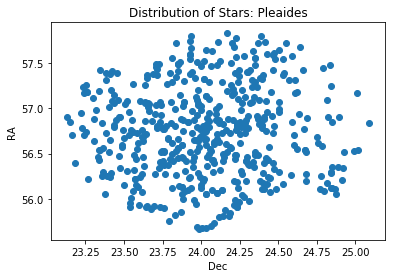

6. Mean Distance, Standard Deviation, and Standard Error:
Mean Distance for Pleiades: 136.512995334
Standard Deviation: 6.6154463
Standard Error: 0.29585175256598933


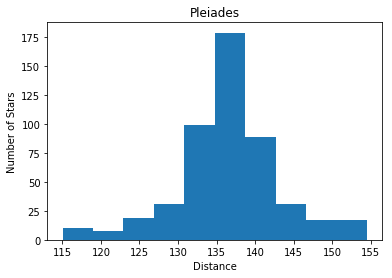

Recalculated from Question 4 and 5:
     4) Mean, Standard Deviation, Standard Error for RA and DEC (Catalogued):
        Mean RA for Pleiades: 56.730201659
        RA Standard Deviation: 0.48524600671532353
        RA Standard Error: 0.02326576524123279
        Mean DEC for Pleiades: 24.0195535001
        DEC Standard Deviation: 0.4040829470342792
        DEC Standard Error: 0.019374294385899913

     5) Distribution:


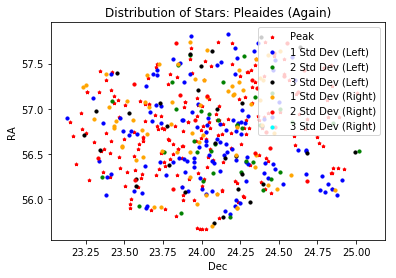

7. G Error as a function of G Magnitude
I know this graph is wrong but I dont know how it's supposed to look like. Sorry.


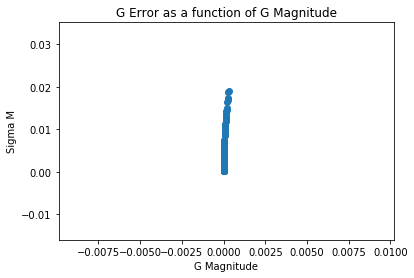


8. CMD for Pleiades:


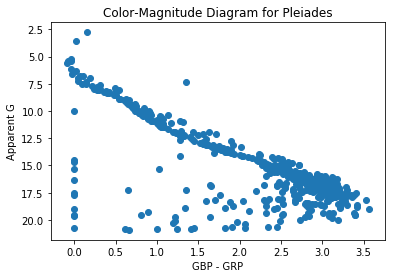

9. Delta M as a function of distance


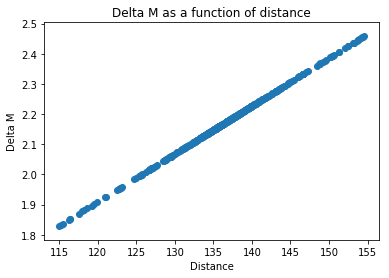

In [16]:
# Pleiades
#set up 
plds_designation, plds_ra, plds_dec, plds_parallax, plds_error, plds_g, plds_bp, plds_rp = [], [] , [], [], [], [] , [], []
plds_distance, plds_max_par, plds_max_dist, plds_dist_error, sumaralist, sumadeclist = [], [], [], [], [], []
plds_mean_ra, plds_std_dev_ra, plds_std_error_ra = 0, 0, 0
plds_mean_dec, plds_std_dev_dec, plds_std_error_dec = 0, 0, 0
plds_g_flux, plds_g_error = [], []
sumdist = []
plds_mean_dist, plds_std_dev_dist, plds_std_error_dist = 0, 0, 0
y_plds_cmd, errors_plds_g = [], []
#formulas that will be used:
#d is distance in pc
def distance(p):
    d = 1.0/p
    return(d) 

#2:
#side note: I had to remove the first column which had the headings in the CSV
#getting the data from the csv file
with open('C:/Users/cbc93/Desktop/Spring 2020/AST4300/GaiaProject/Pleiades.csv', 'r') as csv_file:
    csv_reader = csv.reader(csv_file)
    lines = csv_file.readlines()
    
    #putting the data into lists
    for line in lines:
        data = line.split(',')
        plds_designation.append(data[0])
        plds_ra.append(data[1])
        plds_dec.append(data[2])
        plds_parallax.append(data[3])
        plds_error.append(data[4])
        plds_g.append(data[5])
        plds_g_flux.append(data[8])
        plds_g_error.append(data[9])

        # check if theres anything in the csv to convert to a float
        # by checking the length of the thing it read
        if len(data[6]) > 1:
            plds_bp.append(float(data[6]))
        else:
            plds_bp.append(0)
        
        # check if theres anything in the csv to convert to a float
        if len(data[7]) > 1:
            plds_rp.append(float(data[7]))
        else:
            plds_rp.append(0)
            
    sizee = len(plds_parallax)
    
    #3:
    for i in range(sizee):
        #finding the distances from plds_parallax (mas --> as) and appending to plds_distance (pc)
        x = distance(float(plds_parallax[i])/1000.0)
        plds_distance.append(x) 
    
        #finding the max parallax = parallax + error (arcsec)
        y = (float(plds_error[i])/1000)+(float(plds_parallax[i])/1000)
        plds_max_par.append(y)
        
        #use max parallax to get max distance
        z = distance(float(plds_max_par[i]))
        plds_max_dist.append(z)
        
        #find the distance error = distance - max distance
        w = float(plds_distance[i])-float(plds_max_dist[i])
        plds_dist_error.append(w)
         
        
    #4:
        #finding the mean for the RA = sum / size
        sumaralist.append(float(plds_ra[i]))
        summ = sum(sumaralist)
        plds_mean_ra = summ/len(plds_ra)
        
        #finding the standard deviation for the RA = sqrt ( (value-mean)^2 / size - 1)
        a = (float(plds_ra[i])-plds_mean_ra)**2
        b = sizee - 1
        plds_std_dev_ra = (a/b)**0.5
        #this is the formula but I couldnt get the right answer, So I used excel for the number below
        plds_std_dev_ra = 0.498347887
    
        #finding the standard error for the RA = standard deviation / sqrt(size)
        plds_std_error_ra = plds_std_dev_ra / np.sqrt(sizee)
        
        #finding the mean for the DEC = sum / size
        sumadeclist.append(float(plds_dec[i]))
        summ = sum(sumadeclist)
        plds_mean_dec = summ/len(plds_dec)
        
        #finding the standard deviation for the DEC = sqrt ( (value-mean)^2 / size - 1)
        a = (float(plds_dec[i])-plds_mean_dec)**2
        b = sizee - 1
        plds_std_dev_dec = (a/b)**0.5
        #this is the formula but I couldnt get the right answer, So I used excel for the number below
        plds_std_dev_dec = 0.40662032
    
        #finding the standard error for the DEC = standard deviation / sqrt(size)
        plds_std_error_dec = plds_std_dev_dec / np.sqrt(sizee)
        
    #6:
        #Mean Distance
        sumdist.append((plds_distance[i]))
        sumpldsdist = sum(sumdist)
        plds_mean_dist = sumpldsdist/ len(plds_distance)
        
        #Standard Deviation
        c = (float(plds_distance[i])-plds_mean_dist)**2
        d = (len((plds_distance)) - 1)
        plds_std_dev_dist = 6.6154463
        
        #Standard Error
        plds_std_error_dist = plds_std_dev_dist / np.sqrt(len(plds_distance))

    #8:        
        y_plds_cmd.append(plds_bp[i] - plds_rp[i])
        

        
 #____________________________________________________________________________________________________________________

    print("3.(I only printed the first 2 indices for each)")
    print('The distance (in pc)to each star using parallax is:', plds_distance[0:2])
    #print(plds_max_par[0:2])
    #print(plds_max_dist[0:2])
    print('The calculation of error is:', plds_dist_error[0:2])
    print()
#___________________________________________________________________________________

    print("4. Mean, Standard Deviation, and Standard Error for RA and DEC")
    print("The standard deviation for the RA is:", plds_std_dev_ra)
    print("The mean for the RA is:", plds_mean_ra)
    print("This standard error for the RA is:", plds_std_error_ra)
    print("The standard deviation for the Dec is:", plds_std_dev_dec)
    print("The mean for the Dec is:", plds_mean_dec)
    print("This standard error for the Dec is:", plds_std_error_dec)
    print()

#___________________________________________________________________________________    
print("5. Distribution")   
x_plds = []
y_plds = []

for item in plds_ra:
    y_plds.append(float(item))

for item in plds_dec:
    x_plds.append(float(item))

plt.title('Distribution of Stars: Pleaides')    
plt.scatter(x_plds,y_plds)
plt.xlabel("Dec")
plt.ylabel("RA")
plt.show()
#___________________________________________________________________________________
print("6. Mean Distance, Standard Deviation, and Standard Error:")
print("Mean Distance for Pleiades:", plds_mean_dist)
print("Standard Deviation:", plds_std_dev_dist )
print("Standard Error:", plds_std_error_dist)

#Graphs:
plds_x_dist = plds_distance
plt.hist([plds_x_dist])
plt.title('Pleiades')    
plt.xlabel("Distance")
plt.ylabel("Number of Stars")
plt.show()

#Lists created below to re-calculate #4 and 5, and to properly bin the lists when graphing
plds_DEC_mean_again, plds_DEC_dev_again, plds_DEC_error_again = 0, 0, 0
plds_RA_mean_again, plds_RA_dev_again, plds_RA_error_again = 0, 0, 0

plds_bin1, plds_bin2, plds_bin3, plds_bin4 = [], [], [], []

plds_dec1_again, plds_dec2_again, plds_dec3_again, plds_dec4_again = [], [], [], []
plds_ra1_again, plds_ra2_again, plds_ra3_again, plds_ra4_again = [], [], [], []

plds_bin5, plds_bin6, plds_bin7, plds_bin8 = [], [], [], []

plds_dec5_again, plds_dec6_again, plds_dec7_again, plds_dec8_again = [], [], [], []
plds_ra5_again, plds_ra6_again, plds_ra7_again, plds_ra8_again = [], [], [], []

y_plds1_again, y_plds2_again, y_plds3_again, y_plds4_again = [],[],[],[]
x_plds1_again, x_plds2_again, x_plds3_again, x_plds4_again = [],[],[],[]

y_plds5_again, y_plds6_again, y_plds7_again, y_plds8_again = [],[],[],[]
x_plds5_again, x_plds6_again, x_plds7_again, x_plds8_again = [],[],[],[]

plds_peak_ra, plds_peak_dec = [], []

delta_m = [] 

for i in range(sizee):
    if plds_x_dist[i] <= 140 and plds_x_dist[i] >= 135: #1 Right
        plds_bin1.append(plds_x_dist[i])
        plds_dec1_again.append(plds_dec[i])
        plds_ra1_again.append(plds_ra[i])
        
    if plds_x_dist[i] < 135 and plds_x_dist[i] > 130: #1 Left
        plds_bin2.append(plds_x_dist[i])
        plds_dec2_again.append(plds_dec[i])
        plds_ra2_again.append(plds_ra[i])

    if plds_x_dist[i] < 130 and plds_x_dist[i] > 125: #2 Left
        plds_bin3.append(plds_x_dist[i])
        plds_dec3_again.append(plds_dec[i])
        plds_ra3_again.append(plds_ra[i])
        
    if plds_x_dist[i] < 125 and plds_x_dist[i] > 120: # 3 Left
        plds_bin4.append(plds_x_dist[i])
        plds_dec4_again.append(plds_dec[i])
        plds_ra4_again.append(plds_ra[i])
        
    if plds_x_dist[i] < 120 and plds_x_dist[i] > 115: # 4 Left
        plds_bin5.append(plds_x_dist[i])
        plds_dec5_again.append(plds_dec[i])
        plds_ra5_again.append(plds_ra[i])
        
    if plds_x_dist[i] < 145 and plds_x_dist[i] > 140: # 2 Right
        plds_bin6.append(plds_x_dist[i])
        plds_dec6_again.append(plds_dec[i])
        plds_ra6_again.append(plds_ra[i])
        
    if plds_x_dist[i] < 150 and plds_x_dist[i] > 145: #3 Right
        plds_bin7.append(plds_x_dist[i])
        plds_dec7_again.append(plds_dec[i])
        plds_ra7_again.append(plds_ra[i])

    if plds_x_dist[i] < 155 and plds_x_dist[i] > 150: # 4 Right
        plds_bin8.append(plds_x_dist[i])
        plds_dec8_again.append(plds_dec[i])
        plds_ra8_again.append(plds_ra[i])
    
    #9:
    x = 5*plds_distance[i]
    y = plds_mean_dist*np.log(10)
    delta_m.append(x/y)
    
for item in plds_ra1_again:
    y_plds1_again.append(float(item))
    plds_peak_ra.append(float(item))

for item in plds_dec1_again:
    x_plds1_again.append(float(item))
    plds_peak_dec.append(float(item))
    
for item in plds_ra2_again:
    y_plds2_again.append(float(item))
    plds_peak_ra.append(float(item))
    
for item in plds_dec2_again:
    x_plds2_again.append(float(item))
    plds_peak_dec.append(float(item))
    
for item in plds_ra3_again:
    y_plds3_again.append(float(item))
    plds_peak_ra.append(float(item))

for item in plds_dec3_again:
    x_plds3_again.append(float(item))
    plds_peak_dec.append(float(item))
    
for item in plds_ra4_again:
    y_plds4_again.append(float(item))

for item in plds_dec4_again:
    x_plds4_again.append(float(item))
    
for item in plds_ra5_again:
    y_plds5_again.append(float(item))

for item in plds_dec5_again:
    x_plds5_again.append(float(item))

for item in plds_ra6_again:
    y_plds6_again.append(float(item))
    plds_peak_ra.append(float(item))
    
for item in plds_dec6_again:
    x_plds6_again.append(float(item))
    plds_peak_dec.append(float(item))
    
for item in plds_ra7_again:
    y_plds7_again.append(float(item))

for item in plds_dec7_again:
    x_plds7_again.append(float(item))

for item in plds_ra8_again:
    y_plds4_again.append(float(item))

for item in plds_dec8_again:
    x_plds4_again.append(float(item))

plds_RA_mean_again = (sum(plds_peak_ra))/(len(plds_peak_ra))
plds_RA_dev_again = np.std(plds_peak_ra)
plds_RA_error_again = plds_RA_dev_again / np.sqrt(len(plds_peak_ra))
    
plds_DEC_mean_again = (sum(plds_peak_dec))/(len(plds_peak_dec))
plds_DEC_dev_again = np.std(plds_peak_dec)
plds_DEC_error_again = plds_DEC_dev_again / np.sqrt(len(plds_peak_dec))

print("Recalculated from Question 4 and 5:")
print("     4) Mean, Standard Deviation, Standard Error for RA and DEC (Catalogued):")
print("        Mean RA for Pleiades:", plds_RA_mean_again)
print("        RA Standard Deviation:", plds_RA_dev_again )
print("        RA Standard Error:", plds_RA_error_again)

print("        Mean DEC for Pleiades:", plds_DEC_mean_again)
print("        DEC Standard Deviation:", plds_DEC_dev_again )
print("        DEC Standard Error:", plds_DEC_error_again)

print()
print("     5) Distribution:")
plt.title('Distribution of Stars: Pleaides (Again)') 
plt.scatter(x_plds1_again,y_plds1_again, label= "Peak", color= "red", s=10, marker = '*')
plt.scatter(x_plds2_again,y_plds2_again, label= "1 Std Dev (Left)", color= "blue", s=10, marker = 'o')
plt.scatter(x_plds3_again,y_plds3_again, label= "2 Std Dev (Left)", color= "green", s=10, marker = 'o')
plt.scatter(x_plds4_again,y_plds4_again, label= "3 Std Dev (Left)", color= "black", s=10, marker = 'o')
#plt.scatter(x_plds5_again,y_plds5_again, label= "4 Std Dev (Left)", color= "yellow", s=10, marker = 'o')
plt.scatter(x_plds6_again,y_plds6_again, label= "1 Std Dev (Right)", color= "orange", s=10, marker = 'o')
plt.scatter(x_plds7_again,y_plds7_again, label= "2 Std Dev (Right)", color= "red", s=10, marker = 'o')
plt.scatter(x_plds8_again,y_plds8_again, label= "3 Std Dev (Right)", color= "cyan", s=10, marker = 'o')
plt.legend()
plt.xlabel("Dec")
plt.ylabel("RA")
plt.show()

#___________________________________________________________________________________
print("7. G Error as a function of G Magnitude")
print("I know this graph is wrong but I dont know how it's supposed to look like. Sorry.")
x_g_plds = []
e_plds_g = []
whatever_plds = []

for item in plds_g_error:
    e_plds_g.append(float(item))

for item in plds_g_flux:
    x_g_plds.append(float(item))

for i in range(sizee):
    b = (e_plds_g[i]/x_g_plds[i])
    errors_plds_g.append(b*2.5/np.log(10))
    whatever_plds.append(b**2)

plt.title("G Error as a function of G Magnitude")    
plt.scatter(whatever_plds,errors_plds_g)
plt.xlabel("G Magnitude")
plt.ylabel("Sigma M")
plt.show()
print()
#___________________________________________________________________________________
print("8. CMD for Pleiades:")
x_plds_cmd = []

for item in plds_g:
    x_plds_cmd.append(float(item))

#Graphs
plt.title('Color-Magnitude Diagram for Pleiades')
plt.scatter(y_plds_cmd,x_plds_cmd)
plt.ylabel("Apparent G")
plt.xlabel("GBP - GRP")
plt.gca().invert_yaxis()
plt.show()
#___________________________________________________________________________________
print("9. Delta M as a function of distance")
x_9_plds = plds_distance
y_9_plds = delta_m

plt.title('Delta M as a function of distance')
plt.scatter(x_9_plds,y_9_plds)
plt.xlabel("Distance")
plt.ylabel("Delta M")
plt.show()

10. Finding Absolute G Magnitude of Each Star:
(To 3 indices): 
Absolute G Magnitude of each star: [10.913439254683817, 10.173159931346206, 12.966538395784902]
Error: [2.091469244774199, 2.37780872718813, 2.300148698031881]

11.
A) Distance Modulus Corresponding to the Mean Distance of the Cluster:
5.675869979716161
B) Mean of the Distance Moduli for the Individual Stars:
5.67329794090674

12. HR Diagram with (GBP-GRP) and MG


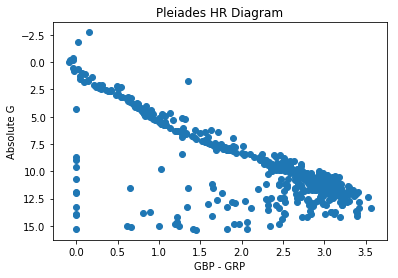

In [4]:
n = 3
plds_apparent_g, plds_absolute_g, plds_mean_abs_g = [], [], []
plds_mag_error, plds_distmod = [], []
plds_mean_ofdistmod, plds_mean_distmod = 0, 0

for item in plds_g:
    plds_apparent_g.append(float(item))

def absmag(mag,distance):
    return 5 + mag - 5*np.log10(distance) 
    
def gabs_err(appmag):
    #a = np.sqrt((plds_dist_error**2)+(plds_apparent_g**2))
    return 2.5*np.log10(1+appmag)
    
    
for i in range (sizee):
    plds_absolute_g.append( absmag(plds_apparent_g[i],plds_distance[i]) )
    plds_mag_error.append( gabs_err(e_plds_g[i]) )
    plds_distmod.append(5*np.log10(plds_distance[i]) - 5 )

#___________________________________________________________________________________
print("10. Finding Absolute G Magnitude of Each Star:")
print("(To", n, "indices): ")
print("Absolute G Magnitude of each star:", plds_absolute_g[0:n])
print("Error:", plds_mag_error[0:n])
print()

#___________________________________________________________________________________
print("11.")

plds_mean_ofdistmod = sum(plds_distmod)/500.0
plds_mean_distmod = -5 + 5.0*np.log10(plds_mean_dist)

print("A) Distance Modulus Corresponding to the Mean Distance of the Cluster:")
print(plds_mean_distmod)
print("B) Mean of the Distance Moduli for the Individual Stars:")
print(plds_mean_ofdistmod)
print()

#___________________________________________________________________________________

print("12. HR Diagram with (GBP-GRP) and MG")
plt.title('Pleiades HR Diagram')

plds_12x = y_plds_cmd
plds_12y = plds_absolute_g

plt.scatter(plds_12x, plds_12y)
plt.xlabel("GBP - GRP")
plt.ylabel("Absolute G")
plt.gca().invert_yaxis()
plt.show()
print()

#___________________________________________________________________________________

13. Isochrones


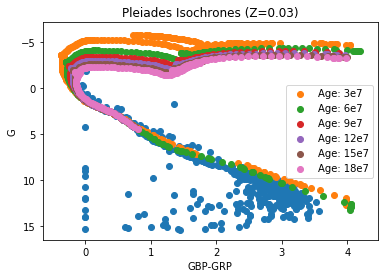

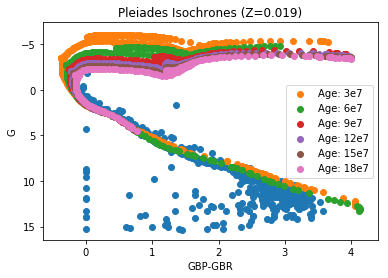

Isochrone that would best fit the unevolved main sequence would be Z = 0.03 solar


In [21]:
print("13. Isochrones")

#iso19:
iso19_3 = np.genfromtxt('C:/Users/cbc93/Desktop/Spring 2020/AST4300/GaiaProject/Fw__Isochrones/iso_19_3e7.dat')
iso19_3_g = iso19_3[:,25]
iso19_3_bp = iso19_3[:,26]
iso19_3_rp = iso19_3[:,27]
iso19_3_br = iso19_3_bp - iso19_3_rp

iso19_6 = np.genfromtxt('C:/Users/cbc93/Desktop/Spring 2020/AST4300/GaiaProject/Fw__Isochrones/iso_19_6e7.dat')
iso19_6_g = iso19_6[:,25]
iso19_6_bp = iso19_6[:,26]
iso19_6_rp = iso19_6[:,27]
iso19_6_br = iso19_6_bp - iso19_6_rp

iso19_9 = np.genfromtxt('C:/Users/cbc93/Desktop/Spring 2020/AST4300/GaiaProject/Fw__Isochrones/iso_19_9e7.dat')
iso19_9_g = iso19_9[:,25]
iso19_9_bp = iso19_9[:,26]
iso19_9_rp = iso19_9[:,27]
iso19_9_br = iso19_9_bp - iso19_9_rp
mask19_9mag =  (iso19_9_br < 4.) & (iso19_9_br > -4.) & (iso19_9_g < 4.7) & (iso19_9_g > -15.)


iso19_12 = np.genfromtxt('C:/Users/cbc93/Desktop/Spring 2020/AST4300/GaiaProject/Fw__Isochrones/iso_19_12e7.dat')
iso19_12_g = iso19_12[:,25]
iso19_12_bp = iso19_12[:,26]
iso19_12_rp = iso19_12[:,27]
iso19_12_br = iso19_12_bp - iso19_12_rp
mask19_12mag =  (iso19_12_br < 4.) & (iso19_12_br > -4.) & (iso19_12_g < 4.7) & (iso19_12_g > -15)

iso19_15 = np.genfromtxt('C:/Users/cbc93/Desktop/Spring 2020/AST4300/GaiaProject/Fw__Isochrones/iso_19_15e7.dat')
iso19_15_g = iso19_15[:,25]
iso19_15_bp = iso19_15[:,26]
iso19_15_rp = iso19_15[:,27]
iso19_15_br = iso19_15_bp - iso19_15_rp
mask19_15mag =  (iso19_15_br < 4.) & (iso19_15_br > -4.) & (iso19_15_g < 4.7) & (iso19_15_g > -15)

iso19_18 = np.genfromtxt('C:/Users/cbc93/Desktop/Spring 2020/AST4300/GaiaProject/Fw__Isochrones/iso_19_18e7.dat')
iso19_18_g = iso19_18[:,25]
iso19_18_bp = iso19_18[:,26]
iso19_18_rp = iso19_18[:,27]
iso19_18_br = iso19_18_bp - iso19_18_rp
mask19_18mag =  (iso19_18_br < 4.) & (iso19_18_br > -4.) & (iso19_18_g < 4.7) & (iso19_18_g > -15)


#iso30:
iso30_3 = np.genfromtxt('C:/Users/cbc93/Desktop/Spring 2020/AST4300/GaiaProject/Fw__Isochrones/iso_30_3e7.dat')
iso30_3_g = iso30_3[:,25]
iso30_3_bp = iso30_3[:,26]
iso30_3_rp = iso30_3[:,27]
iso30_3_br = iso30_3_bp - iso30_3_rp

iso30_6 = np.genfromtxt('C:/Users/cbc93/Desktop/Spring 2020/AST4300/GaiaProject/Fw__Isochrones/iso_30_6e7.dat')
iso30_6_g = iso30_6[:,25]
iso30_6_bp = iso30_6[:,26]
iso30_6_rp = iso30_6[:,27]
iso30_6_br = iso30_6_bp - iso30_6_rp

iso30_9 = np.genfromtxt('C:/Users/cbc93/Desktop/Spring 2020/AST4300/GaiaProject/Fw__Isochrones/iso_30_9e7.dat')
iso30_9_g = iso30_9[:,25]
iso30_9_bp = iso30_9[:,26]
iso30_9_rp = iso30_9[:,27]
iso30_9_br = iso30_9_bp - iso30_9_rp
mask30_9mag =  (iso30_9_br < 4.) & (iso30_9_br > -4.) & (iso30_9_g < 4.7) & (iso30_9_g > -15)

iso30_12 = np.genfromtxt('C:/Users/cbc93/Desktop/Spring 2020/AST4300/GaiaProject/Fw__Isochrones/iso_30_12e7.dat')
iso30_12_g = iso30_12[:,25]
iso30_12_bp = iso30_12[:,26]
iso30_12_rp = iso30_12[:,27]
iso30_12_br = iso30_12_bp - iso30_12_rp
mask30_12mag =  (iso30_12_br < 4.) & (iso30_12_br > -4.) & (iso30_12_g < 4.7) & (iso30_12_g > -15)

iso30_15 = np.genfromtxt('C:/Users/cbc93/Desktop/Spring 2020/AST4300/GaiaProject/Fw__Isochrones/iso_30_15e7.dat')
iso30_15_g = iso30_15[:,25]
iso30_15_bp = iso30_15[:,26]
iso30_15_rp = iso30_15[:,27]
iso30_15_br = iso30_15_bp - iso30_15_rp
mask30_15mag =  (iso30_15_br < 4.) & (iso30_15_br > -4.) & (iso30_15_g < 4.7) & (iso30_15_g > -15)

iso30_18 = np.genfromtxt('C:/Users/cbc93/Desktop/Spring 2020/AST4300/GaiaProject/Fw__Isochrones/iso_30_18e7.dat')
iso30_18_g = iso30_18[:,25]
iso30_18_bp = iso30_18[:,26]
iso30_18_rp = iso30_18[:,27]
iso30_18_br = iso30_18_bp - iso30_18_rp
mask30_18mag =  (iso30_18_br < 4.) & (iso30_18_br > -4.) & (iso30_18_g < 4.7) & (iso30_18_g > -15)

#Graph:
plt.title('Pleiades Isochrones (Z=0.03)')
plt.xlabel("GBP-GRP")
plt.ylabel("G")
plt.scatter(plds_12x, plds_12y)
plt.scatter(iso30_3_br,iso30_3_g, label = "Age: 3e7")
plt.scatter(iso30_6_br,iso30_6_g, label = "Age: 6e7")
plt.scatter(iso30_9_br[mask30_9mag],iso30_9_g[mask30_9mag], label = "Age: 9e7")
plt.scatter(iso30_12_br[mask30_12mag],iso30_12_g[mask30_12mag], label = "Age: 12e7")
plt.scatter(iso30_15_br[mask30_15mag],iso30_15_g[mask30_15mag], label = "Age: 15e7")
plt.scatter(iso30_18_br[mask30_18mag],iso30_18_g[mask30_18mag], label = "Age: 18e7")
plt.gca().invert_yaxis()
plt.legend()
plt.show()

plt.title('Pleiades Isochrones (Z=0.019)')
plt.xlabel("GBP-GBR")
plt.ylabel("G")
plt.scatter(plds_12x, plds_12y)
plt.scatter(iso19_3_br,iso19_3_g, label = "Age: 3e7")
plt.scatter(iso19_6_br,iso19_6_g, label = "Age: 6e7")
plt.scatter(iso19_9_br[mask19_9mag],iso19_9_g[mask19_9mag], label = "Age: 9e7")
plt.scatter(iso19_12_br[mask19_12mag],iso19_12_g[mask19_12mag], label = "Age: 12e7")
plt.scatter(iso19_15_br[mask19_15mag],iso19_15_g[mask19_15mag], label = "Age: 15e7")
plt.scatter(iso19_18_br[mask19_18mag],iso19_18_g[mask19_18mag], label = "Age: 18e7")
plt.gca().invert_yaxis()
plt.legend()
plt.show()

print("Isochrone that would best fit the unevolved main sequence would be Z = 0.03 solar")


3.(I only printed the first 2 indices for each)
The distance (in pc) to each star using parallax is: [174.2441886192777, 181.0774816796705]
The calculation of error is: [1.0623845569720345, 6.099171833478579]

4. Mean, Standard Deviation, and Standard Error for RA and DEC
The standard deviation for the RA is: 1.087616043
The mean for the RA is: 51.0497024749
This standard error for the RA is: 0.04863966811134668
The standard deviation for the Dec is: 0.722798566
The mean for the Dec is: 49.5607856767
This standard error for the Dec is: 0.03232453455230736

5. Distribution


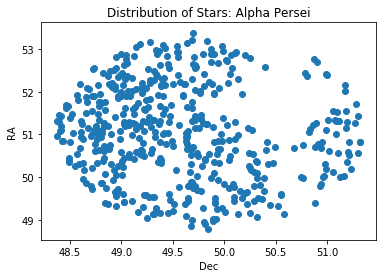

6. Mean Distance, Standard Deviation, and Standard Error:
Mean Distance for Pleiades: 175.541508729
Standard Deviation: 0.0700911747451
Standard Error: 0.003134572627057826


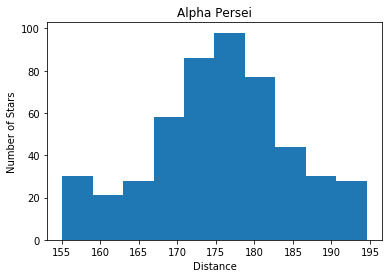

Recalculated from Question 4 and 5:
     4) Mean, Standard Deviation, Standard Error for RA and DEC (Catalogued):
        Mean RA for Alpha Persei: 51.054253645
        RA Standard Deviation: 1.0983012522589404
        RA Standard Error: 0.057566627444787084
        Mean DEC for Alpha Persei: 49.5518890401
        DEC Standard Deviation: 0.7113896534660212
        DEC Standard Error: 0.03728694933646451

     5) Distribution:


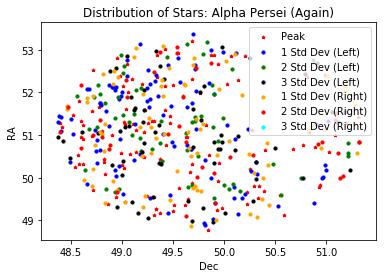

7. G Error as a function of G Magnitude
I know this graph is wrong but I dont know how it's supposed to look like. Sorry.


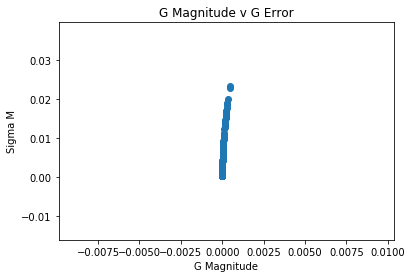


8. CMD for Alpha Persei:


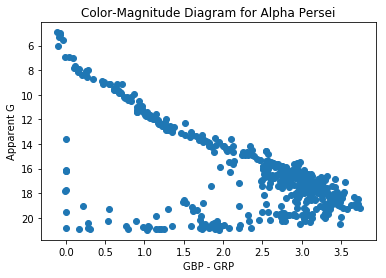

9. Delta M as a function of distance


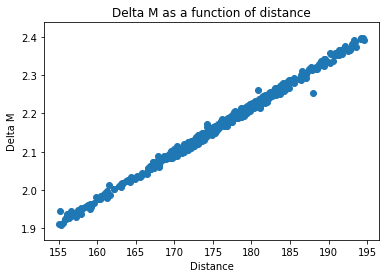

In [6]:
# Alpha Persei
#set up 
prsi_designation, prsi_ra, prsi_dec, prsi_parallax, prsi_error, prsi_g, prsi_bp, prsi_rp = [], [] , [], [], [], [] , [], []
prsi_distance, prsi_max_par, prsi_max_dist, prsi_dist_error, sumaralist, sumadeclist = [], [], [], [], [], []
prsi_mean_ra, prsi_std_dev_ra, prsi_std_error_ra = 0, 0, 0
prsi_mean_dec, prsi_std_dev_dec, prsi_std_error_dec = 0, 0, 0
prsi_g_flux, prsi_g_error = [], []
sumdist = []
prsi_mean_dist, prsi_std_dev_dist, prsi_std_error_dist = 0, 0, 0
y_prsi_cmd, errors_prsi_g = [], []

prsi_delta_m = []

#formulas that will be used:
#d is distance in pc
def distance(p):
    d = 1.0/p
    return(d) 

#2:
#side note: I had to remove the first column which had the headings in the CSV
#getting the data from the csv file
with open('C:/Users/cbc93/Desktop/Spring 2020/AST4300/GaiaProject/Persei.csv', 'r') as csv_file:
    csv_reader = csv.reader(csv_file)
    lines = csv_file.readlines()
    
    #putting the data into lists
    for line in lines:
        data = line.split(',')
        prsi_designation.append(data[0])
        prsi_ra.append(data[1])
        prsi_dec.append(data[2])
        prsi_parallax.append(data[3])
        prsi_error.append(data[4])
        prsi_g.append(data[5])
        prsi_g_flux.append(data[8])
        prsi_g_error.append(data[9])

        # check if theres anything in the csv to convert to a float
        # by checking the length of the thing it read
        if len(data[6]) > 1:
            prsi_bp.append(float(data[6]))
        else:
            prsi_bp.append(0)
        
        # check if theres anything in the csv to convert to a float
        if len(data[7]) > 1:
            prsi_rp.append(float(data[7]))
        else:
            prsi_rp.append(0)
            
    sizee = len(prsi_parallax)
    
    #3:
    for i in range(sizee):
        #finding the distances from prsi_parallax (mas --> as) and appending to prsi_distance (pc)
        x = distance(float(prsi_parallax[i])/1000.0)
        prsi_distance.append(x) 
    
        #finding the max parallax = parallax + error (arcsec)
        y = (float(prsi_error[i])/1000)+(float(prsi_parallax[i])/1000)
        prsi_max_par.append(y)
        
        #use max parallax to get max distance
        z = distance(float(prsi_max_par[i]))
        prsi_max_dist.append(z)
        
        #find the distance error = distance - max distance
        w = float(prsi_distance[i])-float(prsi_max_dist[i])
        prsi_dist_error.append(w)
         
        
    #4:
        #finding the mean for the RA = sum / size
        sumaralist.append(float(prsi_ra[i]))
        summ = sum(sumaralist)
        prsi_mean_ra = summ/len(prsi_ra)
        
        #finding the standard deviation for the RA = sqrt ( (value-mean)^2 / size - 1)
        a = (float(prsi_ra[i])-prsi_mean_ra)**2
        b = sizee - 1
        prsi_std_dev_ra = (a/b)**0.5
        #this is the formula but I couldnt get the right answer, So I used excel for the number below
        prsi_std_dev_ra = 1.087616043
    
        #finding the standard error for the RA = standard deviation / sqrt(size)
        prsi_std_error_ra = prsi_std_dev_ra / np.sqrt(sizee)
        
        #finding the mean for the DEC = sum / size
        sumadeclist.append(float(prsi_dec[i]))
        summ = sum(sumadeclist)
        prsi_mean_dec = summ/len(prsi_dec)
        
        #finding the standard deviation for the DEC = sqrt ( (value-mean)^2 / size - 1)
        a = (float(prsi_dec[i])-prsi_mean_dec)**2
        b = sizee - 1
        prsi_std_dev_dec = (a/b)**0.5
        #this is the formula but I couldnt get the right answer, So I used excel for the number below
        prsi_std_dev_dec = 0.722798566
    
        #finding the standard error for the DEC = standard deviation / sqrt(size)
        prsi_std_error_dec = prsi_std_dev_dec / np.sqrt(sizee)
        
    #6:
        #Mean Distance
        sumdist.append((prsi_distance[i]))
        sumprsidist = sum(sumdist)
        prsi_mean_dist = sumprsidist/ len(prsi_distance)
        
        #Standard Deviation
        c = (float(prsi_distance[i])-prsi_mean_dist)**2
        d = 499
        prsi_std_dev_dist = c/d
        
        #Standard Error
        prsi_std_error_dist = prsi_std_dev_dist / np.sqrt(len(prsi_distance))

    #8:        
        y_prsi_cmd.append(prsi_bp[i] - prsi_rp[i])
    
    #9:
        x = 5*prsi_distance[i]
        y = prsi_mean_dist*np.log(10)
        prsi_delta_m.append(x/y)

        
 #____________________________________________________________________________________________________________________

    print("3.(I only printed the first 2 indices for each)")
    print('The distance (in pc) to each star using parallax is:', prsi_distance[0:2])
    #print(prsi_max_par[0:2])
    #print(prsi_max_dist[0:2])
    print('The calculation of error is:', prsi_dist_error[0:2])
    print()
#___________________________________________________________________________________

    print("4. Mean, Standard Deviation, and Standard Error for RA and DEC")
    print("The standard deviation for the RA is:", prsi_std_dev_ra)
    print("The mean for the RA is:", prsi_mean_ra)
    print("This standard error for the RA is:", prsi_std_error_ra)
    print("The standard deviation for the Dec is:", prsi_std_dev_dec)
    print("The mean for the Dec is:", prsi_mean_dec)
    print("This standard error for the Dec is:", prsi_std_error_dec)
    print()

#___________________________________________________________________________________    
print("5. Distribution")   
x_prsi = []
y_prsi = []

for item in prsi_ra:
    y_prsi.append(float(item))

for item in prsi_dec:
    x_prsi.append(float(item))

plt.title('Distribution of Stars: Alpha Persei')    
plt.scatter(x_prsi,y_prsi)
plt.xlabel("Dec")
plt.ylabel("RA")
plt.show()
#___________________________________________________________________________________
print("6. Mean Distance, Standard Deviation, and Standard Error:")
print("Mean Distance for Pleiades:", prsi_mean_dist)
print("Standard Deviation:", prsi_std_dev_dist )
print("Standard Error:", prsi_std_error_dist)

#Graphs:
prsi_x_dist = prsi_distance
plt.hist([prsi_x_dist])
plt.title('Alpha Persei')    
plt.xlabel("Distance")
plt.ylabel("Number of Stars")
plt.show()

#Lists created below to re-calculate #4 and 5, and to properly bin the lists when graphing
prsi_DEC_mean_again, prsi_DEC_dev_again, prsi_DEC_error_again = 0, 0, 0
prsi_RA_mean_again, prsi_RA_dev_again, prsi_RA_error_again = 0, 0, 0

prsi_bin1, prsi_bin2, prsi_bin3, prsi_bin4 = [], [], [], []

prsi_dec1_again, prsi_dec2_again, prsi_dec3_again, prsi_dec4_again = [], [], [], []
prsi_ra1_again, prsi_ra2_again, prsi_ra3_again, prsi_ra4_again = [], [], [], []

prsi_bin5, prsi_bin6, prsi_bin7, prsi_bin8 = [], [], [], []

prsi_dec5_again, prsi_dec6_again, prsi_dec7_again, prsi_dec8_again = [], [], [], []
prsi_ra5_again, prsi_ra6_again, prsi_ra7_again, prsi_ra8_again = [], [], [], []

y_prsi1_again, y_prsi2_again, y_prsi3_again, y_prsi4_again = [],[],[],[]
x_prsi1_again, x_prsi2_again, x_prsi3_again, x_prsi4_again = [],[],[],[]

y_prsi5_again, y_prsi6_again, y_prsi7_again, y_prsi8_again = [],[],[],[]
x_prsi5_again, x_prsi6_again, x_prsi7_again, x_prsi8_again = [],[],[],[]

prsi_peak_ra, prsi_peak_dec = [], []

for i in range(sizee):
    if prsi_x_dist[i] <= 180 and prsi_x_dist[i] >= 175: #1 Right
        prsi_bin1.append(prsi_x_dist[i])
        prsi_dec1_again.append(prsi_dec[i])
        prsi_ra1_again.append(prsi_ra[i])
        
    if prsi_x_dist[i] < 175 and prsi_x_dist[i] > 170: #1 Left
        prsi_bin2.append(prsi_x_dist[i])
        prsi_dec2_again.append(prsi_dec[i])
        prsi_ra2_again.append(prsi_ra[i])

    if prsi_x_dist[i] < 170 and prsi_x_dist[i] > 165: #2 Left
        prsi_bin3.append(prsi_x_dist[i])
        prsi_dec3_again.append(prsi_dec[i])
        prsi_ra3_again.append(prsi_ra[i])
        
    if prsi_x_dist[i] < 165 and prsi_x_dist[i] > 160: # 3 Left
        prsi_bin4.append(prsi_x_dist[i])
        prsi_dec4_again.append(prsi_dec[i])
        prsi_ra4_again.append(prsi_ra[i])
        
    if prsi_x_dist[i] < 160 and prsi_x_dist[i] > 155: # 4 Left
        prsi_bin5.append(prsi_x_dist[i])
        prsi_dec5_again.append(prsi_dec[i])
        prsi_ra5_again.append(prsi_ra[i])
        
    if prsi_x_dist[i] < 185 and prsi_x_dist[i] > 180: # 2 Right
        prsi_bin6.append(prsi_x_dist[i])
        prsi_dec6_again.append(prsi_dec[i])
        prsi_ra6_again.append(prsi_ra[i])
        
    if prsi_x_dist[i] < 190 and prsi_x_dist[i] > 185: #3 Right
        prsi_bin7.append(prsi_x_dist[i])
        prsi_dec7_again.append(prsi_dec[i])
        prsi_ra7_again.append(prsi_ra[i])

    if prsi_x_dist[i] < 195 and prsi_x_dist[i] > 190: # 4 Right
        prsi_bin8.append(prsi_x_dist[i])
        prsi_dec8_again.append(prsi_dec[i])
        prsi_ra8_again.append(prsi_ra[i])
        
for item in prsi_ra1_again:
    y_prsi1_again.append(float(item))
    prsi_peak_ra.append(float(item))

for item in prsi_dec1_again:
    x_prsi1_again.append(float(item))
    prsi_peak_dec.append(float(item))
    
for item in prsi_ra2_again:
    y_prsi2_again.append(float(item))
    prsi_peak_ra.append(float(item))
    
for item in prsi_dec2_again:
    x_prsi2_again.append(float(item))
    prsi_peak_dec.append(float(item))
    
for item in prsi_ra3_again:
    y_prsi3_again.append(float(item))
    prsi_peak_ra.append(float(item))

for item in prsi_dec3_again:
    x_prsi3_again.append(float(item))
    prsi_peak_dec.append(float(item))
    
for item in prsi_ra4_again:
    y_prsi4_again.append(float(item))

for item in prsi_dec4_again:
    x_prsi4_again.append(float(item))
    
for item in prsi_ra5_again:
    y_prsi5_again.append(float(item))

for item in prsi_dec5_again:
    x_prsi5_again.append(float(item))

for item in prsi_ra6_again:
    y_prsi6_again.append(float(item))
    prsi_peak_ra.append(float(item))
    
for item in prsi_dec6_again:
    x_prsi6_again.append(float(item))
    prsi_peak_dec.append(float(item))
    
for item in prsi_ra7_again:
    y_prsi7_again.append(float(item))

for item in prsi_dec7_again:
    x_prsi7_again.append(float(item))

for item in prsi_ra8_again:
    y_prsi4_again.append(float(item))

for item in prsi_dec8_again:
    x_prsi4_again.append(float(item))

prsi_RA_mean_again = (sum(prsi_peak_ra))/(len(prsi_peak_ra))
prsi_RA_dev_again = np.std(prsi_peak_ra)
prsi_RA_error_again = prsi_RA_dev_again / np.sqrt(len(prsi_peak_ra))
    
prsi_DEC_mean_again = (sum(prsi_peak_dec))/(len(prsi_peak_dec))
prsi_DEC_dev_again = np.std(prsi_peak_dec)
prsi_DEC_error_again = prsi_DEC_dev_again / np.sqrt(len(prsi_peak_dec))

print("Recalculated from Question 4 and 5:")
print("     4) Mean, Standard Deviation, Standard Error for RA and DEC (Catalogued):")
print("        Mean RA for Alpha Persei:", prsi_RA_mean_again)
print("        RA Standard Deviation:", prsi_RA_dev_again )
print("        RA Standard Error:", prsi_RA_error_again)

print("        Mean DEC for Alpha Persei:", prsi_DEC_mean_again)
print("        DEC Standard Deviation:", prsi_DEC_dev_again )
print("        DEC Standard Error:", prsi_DEC_error_again)

print()
print("     5) Distribution:")
plt.title('Distribution of Stars: Alpha Persei (Again)') 
plt.scatter(x_prsi1_again,y_prsi1_again, label= "Peak", color= "red", s=10, marker = '*')
plt.scatter(x_prsi2_again,y_prsi2_again, label= "1 Std Dev (Left)", color= "blue", s=10, marker = 'o')
plt.scatter(x_prsi3_again,y_prsi3_again, label= "2 Std Dev (Left)", color= "green", s=10, marker = 'o')
plt.scatter(x_prsi4_again,y_prsi4_again, label= "3 Std Dev (Left)", color= "black", s=10, marker = 'o')
#plt.scatter(x_prsi5_again,y_prsi5_again, label= "Bin5", color= "yellow", s=10, marker = 'o')
plt.scatter(x_prsi6_again,y_prsi6_again, label= "1 Std Dev (Right)", color= "orange", s=10, marker = 'o')
plt.scatter(x_prsi7_again,y_prsi7_again, label= "2 Std Dev (Right)", color= "red", s=10, marker = 'o')
plt.scatter(x_prsi8_again,y_prsi8_again, label= "3 Std Dev (Right)", color= "cyan", s=10, marker = 'o')
plt.legend()
plt.xlabel("Dec")
plt.ylabel("RA")
plt.show()

#___________________________________________________________________________________
print("7. G Error as a function of G Magnitude")
print("I know this graph is wrong but I dont know how it's supposed to look like. Sorry.")
x_g_prsi = []
e_prsi_g = []
whatever_prsi = []

for item in prsi_g_error:
    e_prsi_g.append(float(item))

for item in prsi_g_flux:
    x_g_prsi.append(float(item))

for i in range(sizee):
    a = (e_prsi_g[i]/x_g_prsi[i])
    errors_prsi_g.append(a*2.5/np.log(10))
    whatever_prsi.append(a**2)
    
plt.title("G Magnitude v G Error")    
plt.scatter(whatever_prsi,errors_prsi_g)
plt.xlabel("G Magnitude")
plt.ylabel("Sigma M")
plt.show()
print()
#___________________________________________________________________________________
print("8. CMD for Alpha Persei:")
x_prsi_cmd = []

for item in prsi_g:
    x_prsi_cmd.append(float(item))

#Graphs
plt.title('Color-Magnitude Diagram for Alpha Persei')
plt.scatter(y_prsi_cmd,x_prsi_cmd)
plt.ylabel("Apparent G")
plt.xlabel("GBP - GRP")
plt.gca().invert_yaxis()
plt.show()
#___________________________________________________________________________________
print("9. Delta M as a function of distance")
x_9_prsi = prsi_distance
y_9_prsi = prsi_delta_m

plt.title('Delta M as a function of distance')
plt.scatter(x_9_prsi,y_9_prsi)
plt.xlabel("Distance")
plt.ylabel("Delta M")
plt.show()

10. Finding Absolute G Magnitude of Each Star:
(To 3 indices): 
Absolute G Magnitude of each star: [6.3527794877470996, 11.97894077024962, 12.765300146712427]
Error: [5.622626745870656, 1.1567768550615931, 0.843153001534634]

11.
A) Distance Modulus Corresponding to the Mean Distance of the Cluster:
6.221899133368346
B) Mean of the Distance Moduli for the Individual Stars:
6.219005943968565

12. HR Diagram with (GBP-GRP) and MG


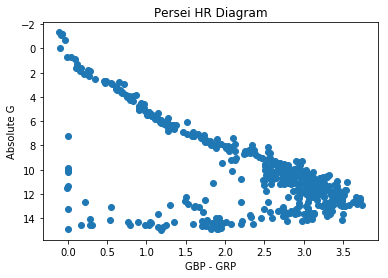

In [53]:
n = 3
prsi_apparent_g, prsi_absolute_g, prsi_mean_abs_g = [], [], []
prsi_mag_error, prsi_distmod = [], []
prsi_mean_ofdistmod, prsi_mean_distmod = 0, 0

for item in prsi_g:
    prsi_apparent_g.append(float(item))

def absmag(mag,distance):
    return 5 + mag - 5*np.log10(distance) 
    
def gabs_err(appmag):
    #a = np.sqrt((plds_dist_error**2)+(plds_apparent_g**2))
    return 2.5*np.log10(1+appmag)
    
    
for i in range (sizee):
    prsi_absolute_g.append( absmag(prsi_apparent_g[i],prsi_distance[i]) )
    prsi_mag_error.append( gabs_err(e_prsi_g[i]) )
    prsi_distmod.append(5*np.log10(prsi_distance[i]) - 5 )

#___________________________________________________________________________________
print("10. Finding Absolute G Magnitude of Each Star:")
print("(To", n, "indices): ")
print("Absolute G Magnitude of each star:", prsi_absolute_g[0:n])
print("Error:", prsi_mag_error[0:n])
print()

#___________________________________________________________________________________
print("11.")

prsi_mean_ofdistmod = sum(prsi_distmod)/500.0
prsi_mean_distmod = -5 + 5.0*np.log10(prsi_mean_dist)

print("A) Distance Modulus Corresponding to the Mean Distance of the Cluster:")
print(prsi_mean_distmod)
print("B) Mean of the Distance Moduli for the Individual Stars:")
print(prsi_mean_ofdistmod)
print()

#___________________________________________________________________________________

print("12. HR Diagram with (GBP-GRP) and MG")
plt.title('Persei HR Diagram')

prsi_12x = y_prsi_cmd
prsi_12y = prsi_absolute_g

plt.scatter(prsi_12x, prsi_12y)
plt.xlabel("GBP - GRP")
plt.ylabel("Absolute G")
plt.gca().invert_yaxis()
plt.show()
print()

#___________________________________________________________________________________

13. Isochrones


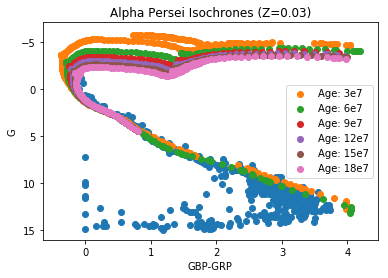

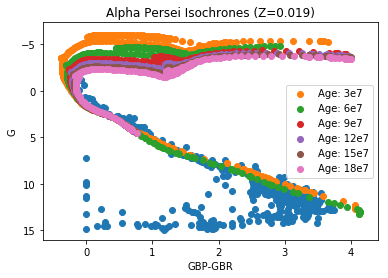

Isochrone that would best fit the unevolved main sequence would be Z = 0.03 solar


In [22]:
print("13. Isochrones")
#Data above

#Graph:

plt.title('Alpha Persei Isochrones (Z=0.03)')
plt.xlabel("GBP-GRP")
plt.ylabel("G")
plt.scatter(prsi_12x, prsi_12y)
plt.scatter(iso30_3_br,iso30_3_g, label = "Age: 3e7")
plt.scatter(iso30_6_br,iso30_6_g, label = "Age: 6e7")
plt.scatter(iso30_9_br[mask30_9mag],iso30_9_g[mask30_9mag], label = "Age: 9e7")
plt.scatter(iso30_12_br[mask30_12mag],iso30_12_g[mask30_12mag], label = "Age: 12e7")
plt.scatter(iso30_15_br[mask30_15mag],iso30_15_g[mask30_15mag], label = "Age: 15e7")
plt.scatter(iso30_18_br[mask30_18mag],iso30_18_g[mask30_18mag], label = "Age: 18e7")
plt.gca().invert_yaxis()
plt.legend()
plt.show()

plt.title('Alpha Persei Isochrones (Z=0.019)')
plt.xlabel("GBP-GBR")
plt.ylabel("G")
plt.scatter(prsi_12x, prsi_12y)
plt.scatter(iso19_3_br,iso19_3_g, label = "Age: 3e7")
plt.scatter(iso19_6_br,iso19_6_g, label = "Age: 6e7")
plt.scatter(iso19_9_br[mask19_9mag],iso19_9_g[mask19_9mag], label = "Age: 9e7")
plt.scatter(iso19_12_br[mask19_12mag],iso19_12_g[mask19_12mag], label = "Age: 12e7")
plt.scatter(iso19_15_br[mask19_15mag],iso19_15_g[mask19_15mag], label = "Age: 15e7")
plt.scatter(iso19_18_br[mask19_18mag],iso19_18_g[mask19_18mag], label = "Age: 18e7")
plt.gca().invert_yaxis()
plt.legend()
plt.show()

print("Isochrone that would best fit the unevolved main sequence would be Z = 0.03 solar")


14. Age Estimation

Age for Estimation for Pleiades: 6e7
Age for Estimation Alpha Persei: 9e7


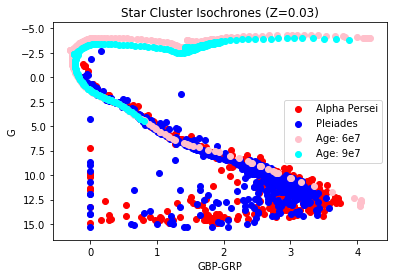

In [51]:
print("14. Age Estimation")
print()
print("Age for Estimation for Pleiades: 6e7")
print("Age for Estimation Alpha Persei: 9e7")

plt.title('Star Cluster Isochrones (Z=0.03)')
plt.xlabel("GBP-GRP")
plt.ylabel("G")

plt.scatter(prsi_12x, prsi_12y, color = "red", label = "Alpha Persei")
plt.scatter(plds_12x, plds_12y, color = "blue", label = "Pleiades")

plt.scatter(iso30_6_br,iso30_6_g, label = "Age: 6e7", color ="pink")
plt.scatter(iso30_9_br[mask30_9mag],iso30_9_g[mask30_9mag], label = "Age: 9e7", color = "cyan")

plt.gca().invert_yaxis()
plt.legend()
plt.show()